# Thiết kế mạng nơ-ron tích chập xử lý hình ảnh chữ số viết tay

**Mạng nơ-ron tích chập** (*Convolutional Neural Network - CNN*) là một loại mạng nơ-ron sâu, thường được sử dụng trong xử lý hình ảnh và video.

Cấu trúc cơ bản của CNN bao gồm 3 lớp chính:

<font color='green'>1.   *Lớp Tích chập (Convolutional Layer)*</font>

* **Bộ lọc** (*Filter* hoặc *Kernel*): Một ma trận nhỏ được sử dụng để trích xuất đặc trưng từ hình ảnh thông qua việc "quét" qua hình ảnh.

* **Tích chập** (*Convolution*): Phép toán tích chập được thực hiện giữa bộ lọc và một vùng nhỏ của hình ảnh để tạo ra một bản đồ đặc trưng.

* **Bản đồ đặc trưng** (*Feature Map*): Kết quả của phép tích chập, mô tả thông tin về các đặc trưng được bộ lọc phát hiện.


<font color='green'>2.   *Lớp Gộp (Pooling Layer)*</font>

* Gộp (Pooling): Phép toán giảm kích thước không gian của bản đồ đặc trưng, giữ lại thông tin quan trọng và loại bỏ thông tin không cần thiết.

* Gộp tối đại (Max Pooling): Một phương pháp phổ biến của pooling, chọn giá trị lớn nhất từ một vùng nhỏ của bản đồ đặc trưng.

<font color='green'>3. *Lớp Kết nối Đầy đủ (Fully Connected Layer)*</font>

* Nơ-ron: Các đơn vị tính toán cơ bản của mạng.

* Hàm kích hoạt: Hàm chuyển đổi đầu ra của mỗi nơ-ron, ví dụ như hàm ReLU hoặc Sigmoid.

* Lớp đầu ra: Lớp cuối cùng của mạng, thường sử dụng hàm Softmax để phân loại.

Quy trình làm việc cơ bản của CNN trong bài toán phân loại hình ảnh:

* **Bước 1.** *Tiền xử lý:* Hình ảnh đầu vào thường được chuẩn hóa về kích thước và giá trị pixel.

* **Bước 2.** *Tích chập và Gộp:* Sử dụng các bộ lọc để trích xuất đặc trưng và giảm kích thước không gian của hình ảnh.

* **Bước 3.** *Học đặc trưng:* Tự động học các đặc trưng từ hình ảnh thông qua các lớp tích chập và gộp.

* **Bước 4.** *Phân loại:* Sử dụng các đặc trưng đã học để phân loại hình ảnh vào các lớp tương ứng.

* **Bước 5.** *Đánh giá và Tối ưu:* Sử dụng hàm mất mát để đánh giá hiệu suất của mô hình và thuật toán tối ưu (ví dụ: Gradient Descent) để cập nhật trọng số và cải thiện mô hình.

# Kiến trúc mạng nơ-ron tích chập

Trong mạng nơ-ron tích chập, các trạng thái ở mỗi lớp được tổ chức theo cấu trúc lưới không gian (*spatial grid*). Những mối quan hệ không gian này được kế thừa từ lớp này sang lớp kế tiếp vì mỗi giá trị đặc trưng dựa trên một khu vực không gian địa phương nhỏ ở lớp trước đó. Việc duy trì những mối quan hệ không gian này giữa các ô lưới là quan trọng, vì phép tích chập và biến đổi sang lớp tiếp theo phụ thuộc nặng nề vào những mối quan hệ này. 

Mỗi lớp trong mạng tích chập là một cấu trúc lưới $3$ chiều, có chiều cao, chiều rộng, và chiều sâu. Chiều sâu của một lớp trong mạng nơ-ron tích chập không nên bị nhầm lẫn với chiều sâu của chính mạng. Từ "chiều sâu" (khi được sử dụng trong ngữ cảnh của một lớp đơn lẻ) ám chỉ số lượng kênh ở mỗi lớp, chẳng hạn như số lượng kênh màu chính (ví dụ: xanh dương, xanh lá và đỏ) trong hình ảnh đầu vào hoặc số lượng bản đồ đặc trưng trong các lớp ẩn.

Dữ liệu đầu vào cho mạng nơ-ron tích chập được tổ chức thành một cấu trúc lưới 2 chiều, và giá trị của từng điểm lưới được gọi là các pixel. Do đó, mỗi pixel tương ứng với một vị trí không gian trong hình ảnh. Tuy nhiên, để mã hóa màu sắc chính xác của pixel, chúng ta cần một mảng giá trị đa chiều tại mỗi vị trí lưới. Trong lược đồ màu RGB, chúng ta có cường độ của ba màu chính, tương ứng với đỏ, xanh lá và xanh dương. Do đó, nếu kích thước không gian của một hình ảnh là $32 \times 32$ pixel và chiều sâu là $3$ (tương ứng với các kênh màu RGB), thì tổng số pixel trong hình ảnh là $32 \times 32 \times 3$. Kích thước hình ảnh cụ thể này khá phổ biến, và cũng xuất hiện trong một bộ dữ liệu thường được sử dụng  để đánh giá, được biết đến với tên CIFAR-10.

Việc biểu diễn lớp đầu vào bằng cấu trúc $3$ chiều này là tự nhiên vì $2$ chiều được dành cho mối quan hệ không gian và một chiều thứ $3$ được dành cho các tính chất độc lập dọc theo những kênh này. Ví dụ, cường độ của các màu chính là các tính chất độc lập trong lớp đầu tiên, được mã hóa bằng chiều thứ $3$. Trong các lớp ẩn, những tính chất độc lập này tương ứng với các loại hình dạng khác nhau được trích xuất từ các khu vực địa phương của hình ảnh.

Giả sử đầu vào của lớp $q$ có kích $L_q \times B_q \times d_q$ trong đó $L_q$ là chiều cao (height)  hoặc chiều dài (length), $B_q$ là chiều rộng (width) hoặc chiều ngang (breadth), $d_q$ là chiều sâu (depth). Đối với lớp đầu tiên (lớp đầu vào), những giá trị này được quyết định bởi bản chất của dữ liệu và quá trình tiền xử lý của nó. Chẳng hạn, bộ dữ liệu CIFAR-10 có $L_1 = 32$, $B_1 = 32$, $d_1 = 3$.

# Bản đồ đặc trưng

Khi $q>1$ (tức không kể đến lớp đầu tiên), thì mỗi lưới không gian $2$ chiều nằm dọc theo chiều sâu được gọi là bản đồ đặc trưng (feature map) hay bản đồ kích hoạt (activation map). 
* Bản đồ đặc trưng là kết quả đầu ra của một lớp tích chập trong mạng nơ-ron tích chập. 
* Mỗi bản đồ đặc trưng được tạo ra bằng cách áp dụng một bộ lọc (filter hoặc kernel) lên hình ảnh đầu vào hoặc bản đồ đặc trưng từ lớp trước.
* Bản đồ đặc trưng đại diện cho nơi mà các đặc điểm (được bộ lọc đặc trưng hóa) xuất hiện trong hình ảnh đầu vào.

Các lớp sau trong CNN đều có cùng cấu trúc $3$ chiều như lớp đầu vào, nhưng ý nghĩa của các giá trị trong lưới này đã thay đổi:

* Chiều cao $L_q$ và chiều rộng $B_q$ của lưới đại diện cho không gian $2$ chiều của ảnh hoặc bản đồ đặc trưng.
* Chiều sâu của lưới không gian $d_q$ không còn đại diện cho các kênh màu như trong lớp đầu vào, mà nó đại diện cho số lượng các bản đồ đặc trưng khác nhau tại mỗi vị trí không gian. Giá trị của $d_q$ thường lớn hơn $3$ và dần tăng lên trong các lớp ẩn vì số lượng thuộc tính độc lập của một khu vực có liên quan đến bài toán phân loại thường khá đáng kể.

# Phép toán tích chập

Trong mạng nơ-ron tích chập, các tham số được tổ chức thành các bộ đơn vị cấu trúc $3$ chiều (bộ lọc, filter hay kernel). Bộ lọc thường là hình vuông về mặt kích thước không gian và thường nhỏ hơn nhiều so với những lớp mà bộ lọc được áp dụng. Ngược lại, độ sâu của bộ lọc luôn luôn giống như lớp mà nó được áp dụng. Giả sử kích thước bộ lọc trong lớp $q$ là $F_q \times F_q \times d_q$, trong đó $F_q$ thường nhỏ và là số lẻ.

Phép toán tích chập đặt bộ lọc tại mỗi vị trí có thể có trong hình ảnh (hoặc lớp ẩn) để bộ lọc trùng hợp hoàn toàn với hình ảnh, và thực hiện một tích vô hướng giữa các tham số $F_q \times F_q \times d_q$ trong bộ lọc với vùng địa phương của lưới phù hợp có cùng kích thường $F_q \times F_q \times d_q$. 

<div>
   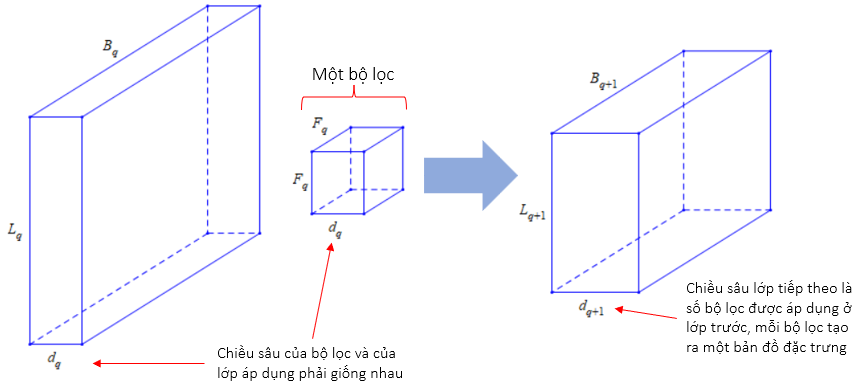
</div>

Số lượng sắp xếp giữa bộ lọc và hình ảnh xác định chiều cao và chiều rộng không gian của lớp ẩn tiếp theo. Khi thực hiện các phép tích chập ở lớp thứ $q$, người ta có thể căn chỉnh bộ lọc tại $L_{q+1}=L_q-F_q+1$ vị trí dọc theo chiều cao và $B_{q+1}=B_q-F_q+1$ vị trí dọc theo chiều rộng của hình ảnh (không có một phần của bộ lọc "nhô ra" từ biên của hình ảnh). Điều này tạo ra tổng cộng $L_{q+1} \times B_{q+1}$ tích vô hướng có thể có, xác định kích thước của lớp ẩn tiếp theo. Lưu ý, có thể có nhiều bộ lọc và việc áp dụng mỗi một bộ lọc sẽ xác định một bản đồ đặc trưng dọc theo chiều sâu của lớp đầu ra. Thông thường, các lớp sau cùng có kích thước không gian nhỏ hơn, nhưng độ sâu lớn hơn về số lượng bản đồ đặc trưng. 

<div>
   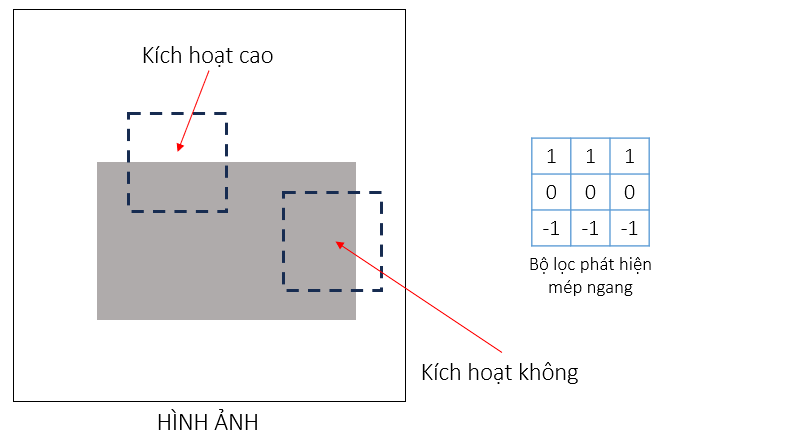
</div>

Như được hiển thị trong hình minh họa trên, đặc trưng kết quả sẽ có kích hoạt cao tại mỗi vị trí mà một mép ngang được nhìn thấy. Một mép hoàn toàn dọc sẽ cho kích hoạt bằng không, trong khi một mép nghiêng có thể cho kích hoạt ở giữa. Do đó, việc trượt bộ lọc ở mọi nơi trên hình ảnh sẽ ngay lập tức phát hiện ra một số đường viền chính của hình ảnh trong một bản đồ đặc trưng duy nhất của khối lượng đầu ra. Nhiều bộ lọc được sử dụng để tạo ra một khối lượng đầu ra với nhiều hơn một bản đồ đặc trưng. Ví dụ, một bộ lọc khác có thể được dùng để tạo ra một bản đồ đặc trưng của kích hoạt mép dọc.

Bây giờ, ta sẽ định nghĩa phép toán tích chập. Bộ lọc thứ $p$ trong lớp thứ $q$ được biểu diễn bởi tensor $3$ chiều $W = \left[w^{(p,q)}_{ijk}\right]$. Các chỉ số $i$, $j$, $k$ chỉ vị trí dọc theo chiều cao, chiều rộng, và chiều sâu của bộ lọc. Các bản đồ đặc trưng trong lớp thứ $q$ được biểu diễn bởi tensor $3$ chiều $H^{(q)} = \left[h^{(q)}_{ijk}\right]$, trong trường hợp $q=1$ tương ứng với ký hiệu $H^{(1)}$ đơn giản chỉ lớp đầu vào (không ẩn). Khi đó, phép toán tích chập từ lớp thứ $q$ đến lớp thứ $q+1$ thông qua bộ lọc thứ $p$ là:
\begin{align*}
h^{(q+1)}_{ijp} = \sum_{r=1}^{F_q} \sum_{s=1}^{F_q} \sum_{k=1}^{d_q} w^{(p,q)}_{rsk}h^{(q)}_{i+r-1,j+s-1,k}
\end{align*}
với mọi $i \in \{1,2,\ldots,L_q-F_q+1\}$, $j \in \{1,2,\ldots,B_q-F_q+1\}$ và $p \in \{1,2,\ldots,d_{p+1}\}$.

<div>
   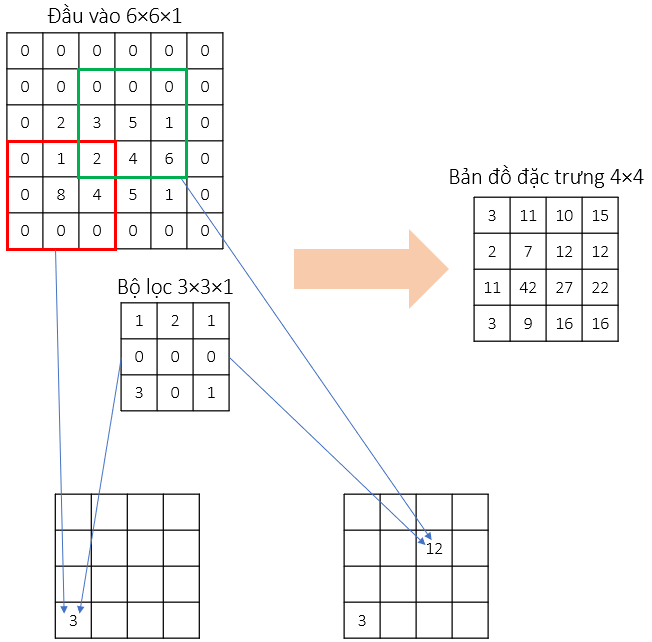
</div>


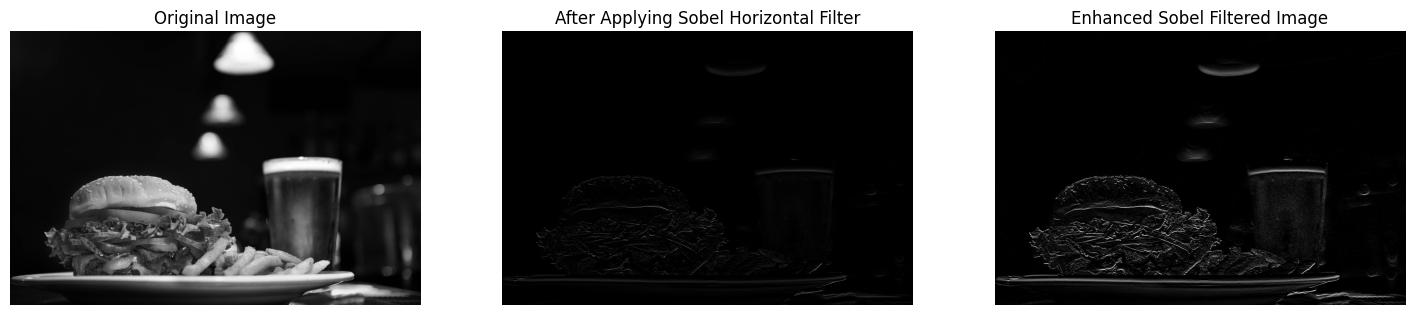

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tải hình ảnh
image = cv2.imread('C:\\Users\\admin\\Downloads\\fastfood.jpg', cv2.IMREAD_GRAYSCALE)  # Thay thế đường dẫn của bạn ở đây

# Định nghĩa bộ lọc ngang
horizontal_filter = np.array([[1, 2, 1],
                              [0, 0, 0],
                              [-1, -2, -1]])

# Thực hiện tích chập
convolved_image = cv2.filter2D(image, -1, horizontal_filter)
enhanced_image = cv2.convertScaleAbs(convolved_image, alpha=3, beta=50)

# Hiển thị hình ảnh
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(convolved_image, cmap='gray')
axs[1].set_title('After Applying Sobel Horizontal Filter')
axs[1].axis('off')

axs[2].imshow(enhanced_image, cmap='gray')
axs[2].set_title('Enhanced Sobel Filtered Image')
axs[2].axis('off')

plt.show()

In [2]:
'''
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Tải và tiền xử lý dữ liệu
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Tạo mô hình CNN với một lớp tích chập
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Lớp tích chập
model.add(layers.MaxPooling2D((2, 2)))  # Lớp pooling
model.add(layers.Flatten())  # Lớp làm phẳng để chuyển từ dữ liệu 2D sang 1D
model.add(layers.Dense(64, activation='relu'))  # Lớp kết nối đầy đủ
model.add(layers.Dense(10, activation='softmax'))  # Lớp đầu ra với 10 nút (các lớp của CIFAR-10)

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình với dữ liệu
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest accuracy:', test_acc)
'''

"\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models\nfrom tensorflow.keras.datasets import cifar10\nfrom tensorflow.keras.utils import to_categorical\n\n# Tải và tiền xử lý dữ liệu\n(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()\ntrain_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize data\ntrain_labels = to_categorical(train_labels)\ntest_labels = to_categorical(test_labels)\n\n# Tạo mô hình CNN với một lớp tích chập\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Lớp tích chập\nmodel.add(layers.MaxPooling2D((2, 2)))  # Lớp pooling\nmodel.add(layers.Flatten())  # Lớp làm phẳng để chuyển từ dữ liệu 2D sang 1D\nmodel.add(layers.Dense(64, activation='relu'))  # Lớp kết nối đầy đủ\nmodel.add(layers.Dense(10, activation='softmax'))  # Lớp đầu ra với 10 nút (các lớp của CIFAR-10)\n\n# Biên dịch mô hình\nmodel.compile(optimizer='adam',\n            